# OpenCV Contours

In general contours are the boundary pixels of an object/image that has same color and intensity. They are useful in shape analysis and object detection/recognition using traditional computer vision algorithms.

Contour is very powerful and common step for **image processing** applications.

Most images contain something in them which means often there's a boundary between say one object to another.

The idea of contours is to create a point-to-point outline around all objects found within an image, the key attribute is that contours are always closed shapes so there's no break or disconnect in the middle of a single contour it defines a complete closed shape on its own.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/vmzfc3wy5wwfrvi/AACY8uK6k6aTF5QJahLkAplta?dl=1 -O module-code.zip -q --show-progress
    !unzip -qq module-code.zip
else:
    pass

In [2]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['image.cmap'] = 'gray'

### 2. Load an image and display

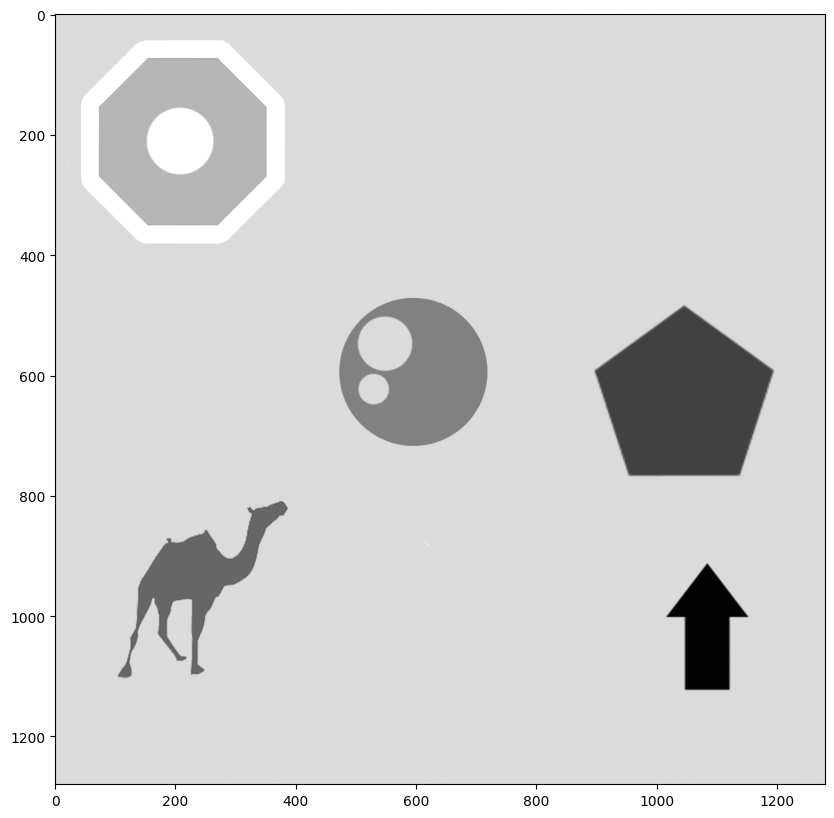

In [8]:
imagePath = "shapes.jpg"
image = cv2.imread(imagePath)

# Convert to grayscale
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display image
plt.imshow(imageGray);

# You certainly can run contours over more complex
# more natural scene images

### 3. Threshold

Remember the idea of contours is to draw a point-to-point outline around the individual shapes which means already have to perform or segmentation of the foreground and background ahead of time.

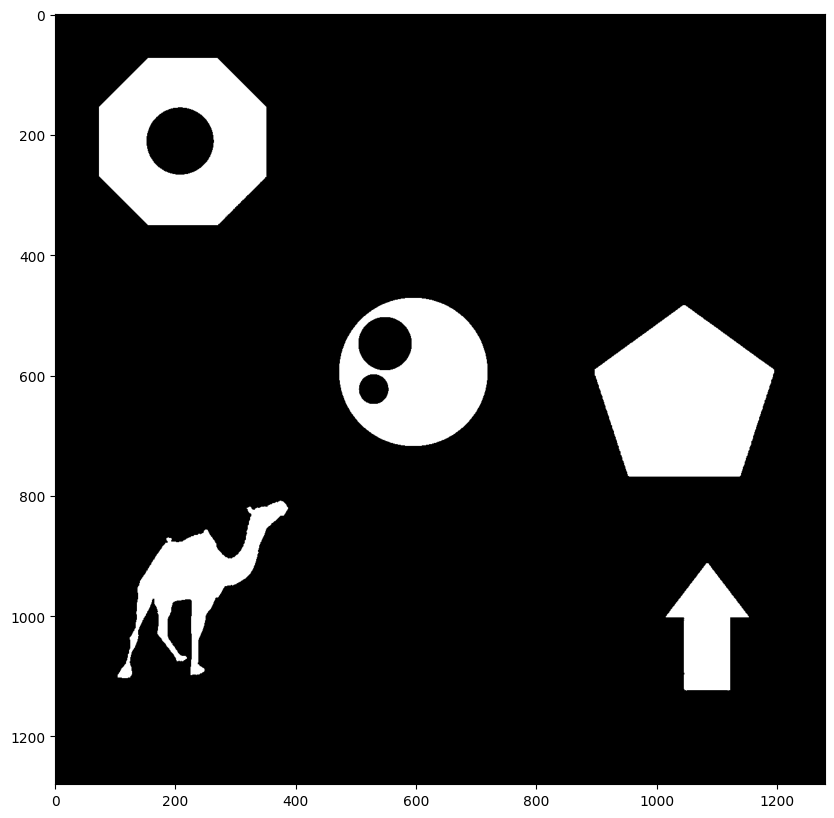

In [10]:
ret, thresh = cv2.threshold(imageGray, 200, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh);